In [1]:
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
from torch import nn
import numpy as np
import torch
import torch.nn.functional as F

In [2]:
#download data
train_transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5,),(0.5,))])


trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True,train=True, transform=train_transform )
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True,train=False, transform=train_transform )
trainloader = torch.utils.data.DataLoader(trainset,batch_size =64  , shuffle = True)
testloader = torch.utils.data.DataLoader(testset,batch_size = 64 , shuffle = True)

In [3]:
#plot the data

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [16]:
image, label = next(iter(trainloader))
images,labels = next(iter(testloader))

In [18]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim,output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 458)
        self.fc2 = nn.Linear(458, 246)
        self.fc3 = nn.Linear(246, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, output_dim)
        self.relu = nn.ReLU()
        #self.softmax = nn.Softmax()

    def forward(self,x):
        layer1 = self.fc1(x)
        act1 = self.relu(layer1)
        layer2 = self.fc2(act1)
        act2 = self.relu(layer2)
        layer3 = self.fc3(act2)
        act3 = self.relu(layer3)
        layer4 = self.fc4(act3)
        act4 = self.relu(layer4)
        layer5 = self.fc5(act4)
        #output = self.softmax(layer4)
        return layer5

model = NeuralNetwork(input_dim=784 , output_dim = 10)

In [6]:
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.CrossEntropyLoss()
# epochs =10

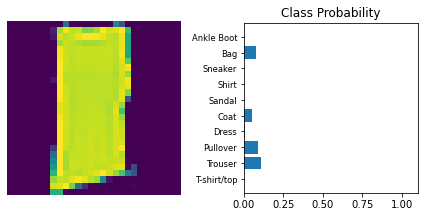

In [19]:
#img = image[2].flatten()
#img = image[1]
#img = image.view(image.shape[0],-1)
img = images[1]
img=img.view(img.shape[0],-1)
ps =model.forward(img)
view_classify(img, ps, version='Fashion')

In [20]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
epochs =100

In [21]:
#print_every = 40
train_losses = []
test_loses = []
accuracies =[]
for epoch in range(epochs):
    tr_losses = 0
  
    print(f'{epoch+1}/{epochs}')
    for idx , (image,label) in enumerate (iter(trainloader)):
        img = image.reshape(image.shape[0],-1)
        optimizer.zero_grad()
        prediction = model.forward(img)
        prediction1 = F.log_softmax(prediction, dim=1)
        train_loss = criterion(prediction1 , label)
        train_loss.backward()
        optimizer.step()
        tr_losses += train_loss.item()
        tra_loss = tr_losses/len(trainloader)

    train_losses.append(tra_loss)

    

    model.eval()
    t_losses = 0
    acuracy1 = 0
    with torch.no_grad():
        for images,labels in testloader:
            images = images.view(images.shape[0],-1)
            test_prediction = model.forward(images)
            test_prediction1 = F.softmax(test_prediction, dim=1)
            test_loss = criterion(test_prediction1,labels)
            t_losses += test_loss.item()
            tes_loss =t_losses/len(testloader)
        
            #top_p, top_class = test_prediction.topk(1,dim=1)
            classes =F.softmax(test_prediction1, dim=1).argmax(dim=1)

            #tes_loss = t_losses/len(testloader)
            
            accuracy = sum(classes == labels)/len(test_prediction)
            acuracy1 += accuracy.item()
            accuracy = acuracy1/len(testloader)
        test_loses.append(tes_loss)
        accuracies.append(accuracy)
        # if idx % print_every == 0:
        #     print(f'epoch: {epoch} | loss: {tra_loss: .4f} | test loss: {test_loss} | accuracy: {accuracy.item()}')
    
        print(f"\tIteration: {idx}\t Loss: {tra_loss:.4f}  test_loss:  {tes_loss:.4f}   accuracy: {accuracy *100}")
       

    model.train()
        

1/100
	Iteration: 937	 Loss: 0.6259  test_loss:  1.6924   accuracy: 80.73248407643312
2/100
	Iteration: 937	 Loss: 0.4876  test_loss:  1.6908   accuracy: 81.48885350318471
3/100
	Iteration: 937	 Loss: 0.4613  test_loss:  1.6918   accuracy: 82.95183121019109
4/100
	Iteration: 937	 Loss: 0.4362  test_loss:  1.6603   accuracy: 83.46934713375796
5/100
	Iteration: 937	 Loss: 0.4156  test_loss:  1.6590   accuracy: 84.00676751592357
6/100
	Iteration: 937	 Loss: 0.4391  test_loss:  1.6520   accuracy: 84.65366242038218
7/100
	Iteration: 937	 Loss: 0.3967  test_loss:  1.6353   accuracy: 85.23089171974523
8/100
	Iteration: 937	 Loss: 0.4158  test_loss:  1.6497   accuracy: 84.35509554140127
9/100
	Iteration: 937	 Loss: 0.4001  test_loss:  1.7169   accuracy: 79.9562101910828
10/100
	Iteration: 937	 Loss: 0.4548  test_loss:  1.6871   accuracy: 81.84713375796179
11/100
	Iteration: 937	 Loss: 0.4454  test_loss:  1.6515   accuracy: 85.3702229299363
12/100
	Iteration: 937	 Loss: 0.4112  test_loss:  1.65

In [22]:
torch.save(model.state_dict(), 'checkpoint.pth')

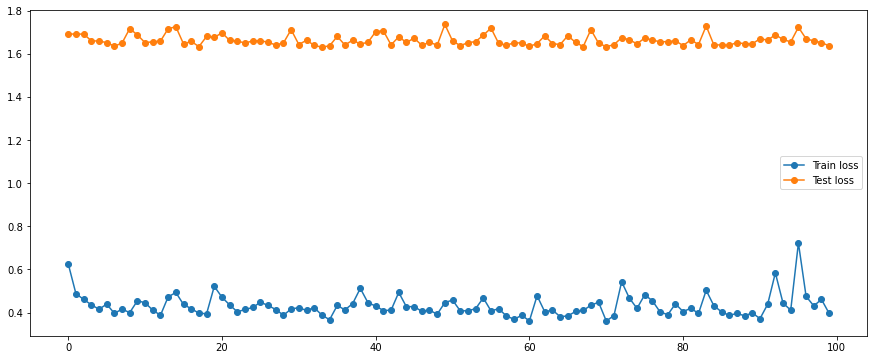

In [23]:
#ax, fig = figsize
x_epoch = list(range(epochs))
plt.figure(figsize=(15, 6))
plt.plot(x_epoch ,train_losses, label='Train loss',marker='o')
plt.plot(x_epoch ,test_loses, label='Test loss',marker='o')
plt.legend()
plt.show()


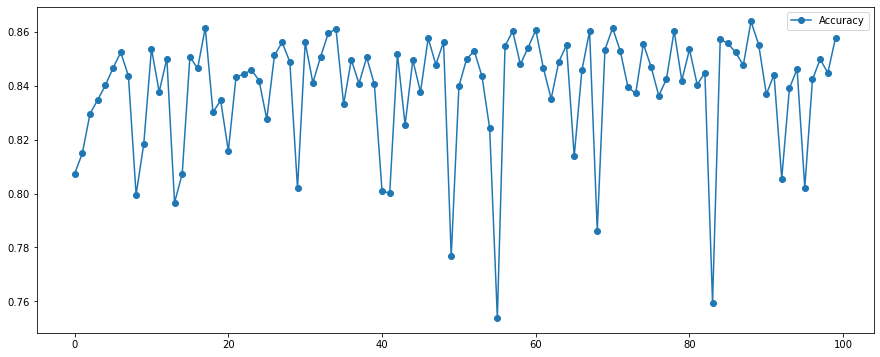

In [24]:
x_epoch = list(range(epochs))
plt.figure(figsize=(15, 6))
plt.plot(x_epoch ,accuracies, label='Accuracy',marker='o')
plt.legend()
plt.show()

In [25]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias', 'fc5.weight', 'fc5.bias'])


In [27]:
model.load_state_dict(state_dict)

<All keys matched successfully>

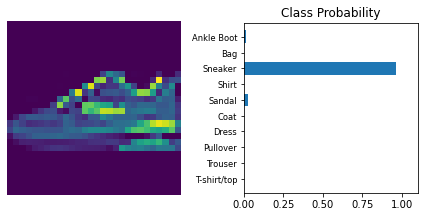

In [31]:
img = images[1].view(1,784)
#img = image[1]
#img = image.view(image.shape[0],-1)
#img = img[1]

ps = F.softmax(model(img), dim=1)
view_classify(img.view(1, 28, 28), ps, version='Fashion')